In [59]:
# import libraries to import, operate and visualize the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [60]:
# loading the customer address data from Customer_Address sheet on Raw_data excel file.

cust_address = pd.read_excel("Raw_data.xlsx", sheet_name= "CustomerAddress")

In [61]:
# checking first 5 rows using .head() from customer address Data.
cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [62]:
# information of the columns and data-types of customer address data.
cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


Datatypes for columns look fine. We can check for data quality and apply cleaning process wherever needed before performing analysis

In [63]:
cust_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [64]:
cust_address.describe(include= 'object')

,address,state,country
count,3999,3999,3999
unique,3996,5,1
top,3 Mariners Cove Terrace,NSW,Australia
freq,2,2054,3999


In [65]:
print("Total rows(records) in the dataset : {}".format(cust_address.shape[0]))
print("Total columns(features) in the dataset : {}".format(cust_address.shape[1]))

Total rows(records) in the dataset : 3999
Total columns(features) in the dataset : 6


In [66]:
# check for columns with numeric and non-numeric values.

#numeric columns
df_numeric = cust_address.select_dtypes(include= [np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))

#non-numeric columns
df_non_numeric = cust_address.select_dtypes(exclude= [np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['customer_id' 'postcode' 'property_valuation']
The non-numeric columns are : ['address' 'state' 'country']


#1. Check for Missing Values

In [67]:
cust_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

There are no missing values in the dataset.

<Axes: >

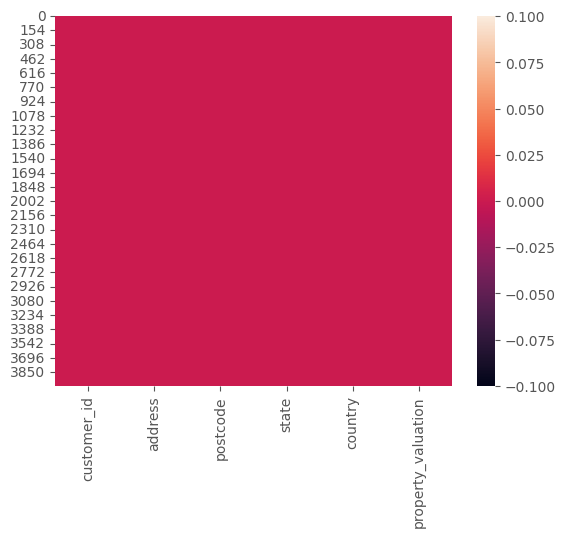

In [68]:
sns.heatmap(cust_address.isnull())

#2. Inconsistency Check

We can check now for inconsistant data/ or typing error data is present in the categorical columns. We will check the columns 'address', 'postcode', 'state', 'country' for this.

##2.1 State


In [69]:
cust_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

There are inconsistant data in the 'state' column. For New South Wales and Voctoria we have two values: one full name and the other short form.
It should be standardized and columns with state names as **New South Wales** shall be replaced by **NSW** and **Victoria** shall be replaced by **VIC**

In [70]:
#create a function to replace the full names of states with their short forms

def replace_state_names(state_name):

  #defining short forms of the names as standard form
  if state_name == 'New South Wales':
    return 'NSW'
  elif state_name =='Victoria':
    return 'VIC'
  else:
    return state_name

  #applying the function on the state column

cust_address['state'] = cust_address['state'].apply(replace_state_names)

In [71]:
# checking if inconsistency still exists.
cust_address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

using the function created on the state column, state name is standardized and there is no inconsistency in the state column.

##2.2 Country

In [72]:
cust_address['country'].value_counts()

Australia    3999
Name: country, dtype: int64

There is no inconsistency in country column data.

##2.3 Postcode

In [73]:
cust_address['postcode'].value_counts()

2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64

Postcode Column looks fine and without inconsistency/ typing error in the data.

In [74]:
cust_address[['address', 'postcode','state', 'country']].drop_duplicates()

,address,postcode,state,country
0,060 Morning Avenue,2016,NSW,Australia
1,6 Meadow Vale Court,2153,NSW,Australia
2,0 Holy Cross Court,4211,QLD,Australia
3,17979 Del Mar Point,2448,NSW,Australia
4,9 Oakridge Court,3216,VIC,Australia
...,...,...,...,...
3994,1482 Hauk Trail,3064,VIC,Australia
3995,57042 Village Green Point,4511,QLD,Australia
3996,87 Crescent Oaks Alley,2756,NSW,Australia
3997,8194 Lien Street,4032,QLD,Australia


#3. Check for Duplication

In [75]:
# Dropping the primary key column i.e. customer_id and storing into a temporary datafrome.

cust_address_dedupped = cust_address.drop('customer_id', axis=1).drop_duplicates()

In [76]:
print("Number of records after removing customer_id(pk), duplicates : {}".format(cust_address_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_address.shape[0]))

Number of records after removing customer_id(pk), duplicates : 3999
Number of records in original dataset : 3999


As the number of records before removing duplicates and after are the same. Hence there are no duplicate records in the dataset.

#4. Outliers Check

<Axes: >

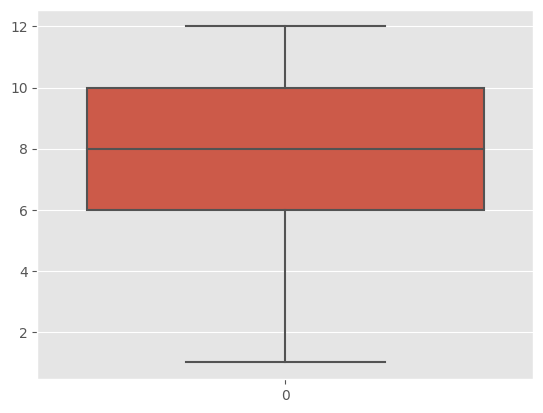

In [77]:
sns.boxplot(cust_address['property_valuation'])

#5. Export cleaned data to csv file.

In [78]:
cust_address.to_csv("Customer_Address_cleaned.csv", index= False)

Checking for Master-Detail record counts:
Checking with the master table( Customer_Demographic_cleaned.csv) containing the entire Customer Data for customer_ids which are getting dropped from Customer_address dataset

**Basically there are some customers which have an address but are not a part of Demographic dataset yet.**

In [81]:
cust_demo_detail = pd.read_csv('Customer_Demographic_cleaned.csv')

In [82]:
cust_demo_detail.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69,70.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42,50.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69,70.0
3,4,Talbot,None,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0,61,70.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46,50.0


In [83]:
print("Total records in Customer Demographic Table : {}".format(cust_demo_detail.shape[0]))
print("Total records in Customer Address Table : {}".format(cust_address.shape[0]))
print("In Demographic table {} records are getting dropped due to data cleaning process in Demographic Table".format(cust_address.shape[0]-cust_demo_detail.shape[0]))

Total records in Customer Demographic Table : 3912
Total records in Customer Address Table : 3999
In Demographic table 87 records are getting dropped due to data cleaning process in Demographic Table


Checking for customer_ids in Address table getting dropped:

In [84]:
cust_drop = cust_address.merge(cust_demo_detail, left_on= 'customer_id', right_on= 'customer_id', how= 'outer')

cust_drop.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,060 Morning Avenue,2016.0,NSW,Australia,10.0,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0,70.0
1,2,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0,50.0
2,4,0 Holy Cross Court,4211.0,QLD,Australia,9.0,Talbot,None,Male,33.0,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0,61.0,70.0
3,5,17979 Del Mar Point,2448.0,NSW,Australia,4.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46.0,50.0
4,6,9 Oakridge Court,3216.0,VIC,Australia,9.0,Curr,Duckhouse,Male,35.0,1966-09-16,Business Systems Development Analyst,Retail,High Net Worth,N,Yes,13.0,56.0,60.0
